In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

import itertools

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-08 14:12:40.624786: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__



'2.12.0'

In [3]:
## Load data
train_data = pd.read_csv("/Users/shibhanisrinivas/InterviewKickstart/Week2/Digit Recognizer Dataset/train.csv")
test_data = pd.read_csv("/Users/shibhanisrinivas/InterviewKickstart/Week2/Digit Recognizer Dataset/test.csv")

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.shape, test_data.shape, min(train_data.loc[0]), max(train_data.loc[0])

((42000, 785), (28000, 784), 0, 255)

In [7]:
train_split, val_split = train_test_split(train_data, train_size=0.9)
train_split.shape, val_split.shape

((37800, 785), (4200, 785))

In [8]:
Y_train, Y_val = train_split["label"], val_split["label"]

X_train = train_split.drop(["label"], axis=1)
X_val = val_split.drop(["label"], axis=1)

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((37800,), (37800, 784), (4200,), (4200, 784))

In [9]:
Y_train.value_counts()

label
1    4212
7    3946
3    3905
2    3801
9    3744
6    3723
0    3710
4    3697
8    3620
5    3442
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

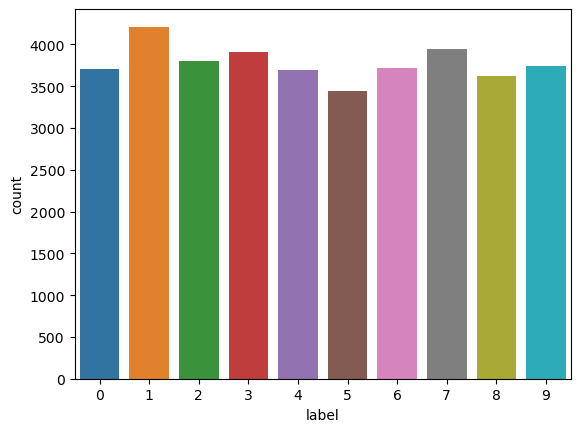

In [10]:
sns.countplot(train_split, x="label")

<Axes: xlabel='label', ylabel='count'>

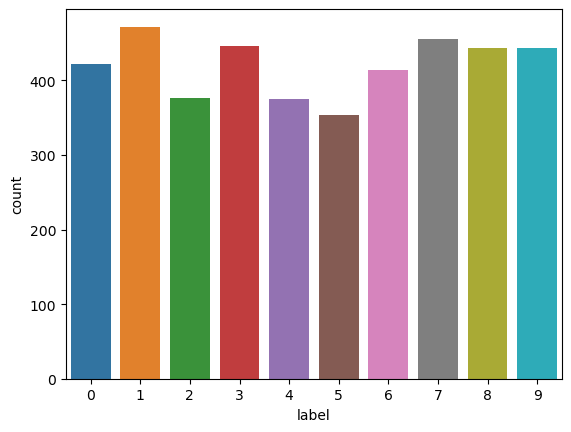

In [11]:
sns.countplot(val_split, x="label")

In [12]:
## Normalize the data
X_train_scaled = X_train / 255.0
X_val_scaled = X_val / 255.0
test_data_scaled = test_data / 255.0

# Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
# Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

type(X_train_scaled)

pandas.core.frame.DataFrame

In [13]:
## Reshape the images to 28x28x1
X_train_scaled = X_train_scaled.values.reshape(-1,28,28,1)
X_val_scaled = X_val_scaled.values.reshape(-1,28,28,1)
test_data_scaled = test_data_scaled.values.reshape(-1,28,28,1)

type(X_train_scaled), X_train_scaled[0].shape

(numpy.ndarray, (28, 28, 1))

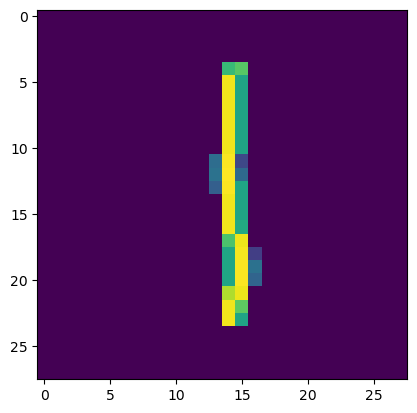

In [14]:
## Plot some examples
plt.imshow(X_train_scaled[0][:,:,:])

In [15]:
## Define CNN model architecture 

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [16]:
## Define optimizer
# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
# loss = tf.keras.losses.SparseCategoricalCrossentropy
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
loss = tf.keras.losses.MeanSquaredError()

In [17]:
## LR annealer
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=0.00001)


In [18]:
## Set Hyperparameters

epochs = 8
batch_size=86

In [19]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,      # Rotating images by 10deg on the fly
    zoom_range=0.1,         # Random zoom
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
)

datagen.fit(X_train_scaled)

In [20]:
# model.compile(optimizer, loss)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train_scaled, Y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_val_scaled, Y_val),
                    verbose=2, steps_per_epoch=X_train_scaled.shape[0]//batch_size) #, callbacks=[learning_rate_reduction])

Epoch 1/8


2024-04-08 14:12:46.101037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


439/439 - 45s - loss: 0.4471 - accuracy: 0.8557 - val_loss: 0.0641 - val_accuracy: 0.9800 - 45s/epoch - 102ms/step
Epoch 2/8
439/439 - 43s - loss: 0.1326 - accuracy: 0.9610 - val_loss: 0.0528 - val_accuracy: 0.9824 - 43s/epoch - 99ms/step
Epoch 3/8
439/439 - 43s - loss: 0.0936 - accuracy: 0.9710 - val_loss: 0.0416 - val_accuracy: 0.9871 - 43s/epoch - 99ms/step
Epoch 4/8
439/439 - 44s - loss: 0.0806 - accuracy: 0.9759 - val_loss: 0.0349 - val_accuracy: 0.9883 - 44s/epoch - 100ms/step
Epoch 5/8
439/439 - 44s - loss: 0.0695 - accuracy: 0.9801 - val_loss: 0.0296 - val_accuracy: 0.9893 - 44s/epoch - 101ms/step
Epoch 6/8
439/439 - 43s - loss: 0.0630 - accuracy: 0.9817 - val_loss: 0.0246 - val_accuracy: 0.9919 - 43s/epoch - 99ms/step
Epoch 7/8
439/439 - 43s - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.0269 - val_accuracy: 0.9917 - 43s/epoch - 99ms/step
Epoch 8/8
439/439 - 43s - loss: 0.0552 - accuracy: 0.9836 - val_loss: 0.0293 - val_accuracy: 0.9912 - 43s/epoch - 98ms/step


132/132 [==============================] - 2s 12ms/step


array([[418,   0,   1,   0,   0,   0,   0,   0,   3,   0],
       [  0, 468,   0,   0,   1,   0,   0,   2,   1,   0],
       [  0,   0, 375,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   3, 438,   0,   2,   0,   0,   3,   0],
       [  0,   0,   0,   0, 373,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0, 352,   0,   0,   1,   0],
       [  0,   0,   1,   0,   0,   0, 412,   0,   1,   0],
       [  0,   1,   4,   0,   0,   0,   0, 448,   0,   2],
       [  0,   0,   0,   0,   1,   0,   0,   0, 442,   0],
       [  0,   0,   0,   0,   2,   3,   0,   1,   1, 437]])

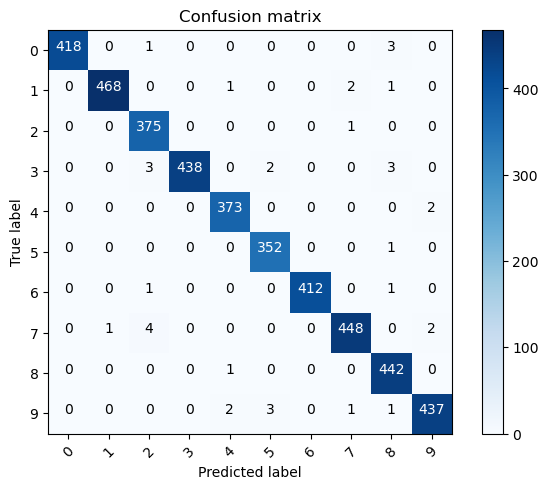

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val_scaled)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
# Y_true = np.argmax(Y_val,axis = 1)
Y_true = Y_val
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))
confusion_mtx

In [30]:
Y_true, Y_val

(12,
 9922     6
 21348    1
 12189    3
 1201     6
 20464    1
         ..
 25134    5
 16911    0
 14718    5
 7896     3
 9149     0
 Name: label, Length: 4200, dtype: int64)

In [27]:
Y_pred_classes, len(Y_pred_classes)

(array([6, 1, 3, ..., 5, 3, 0]), 4200)